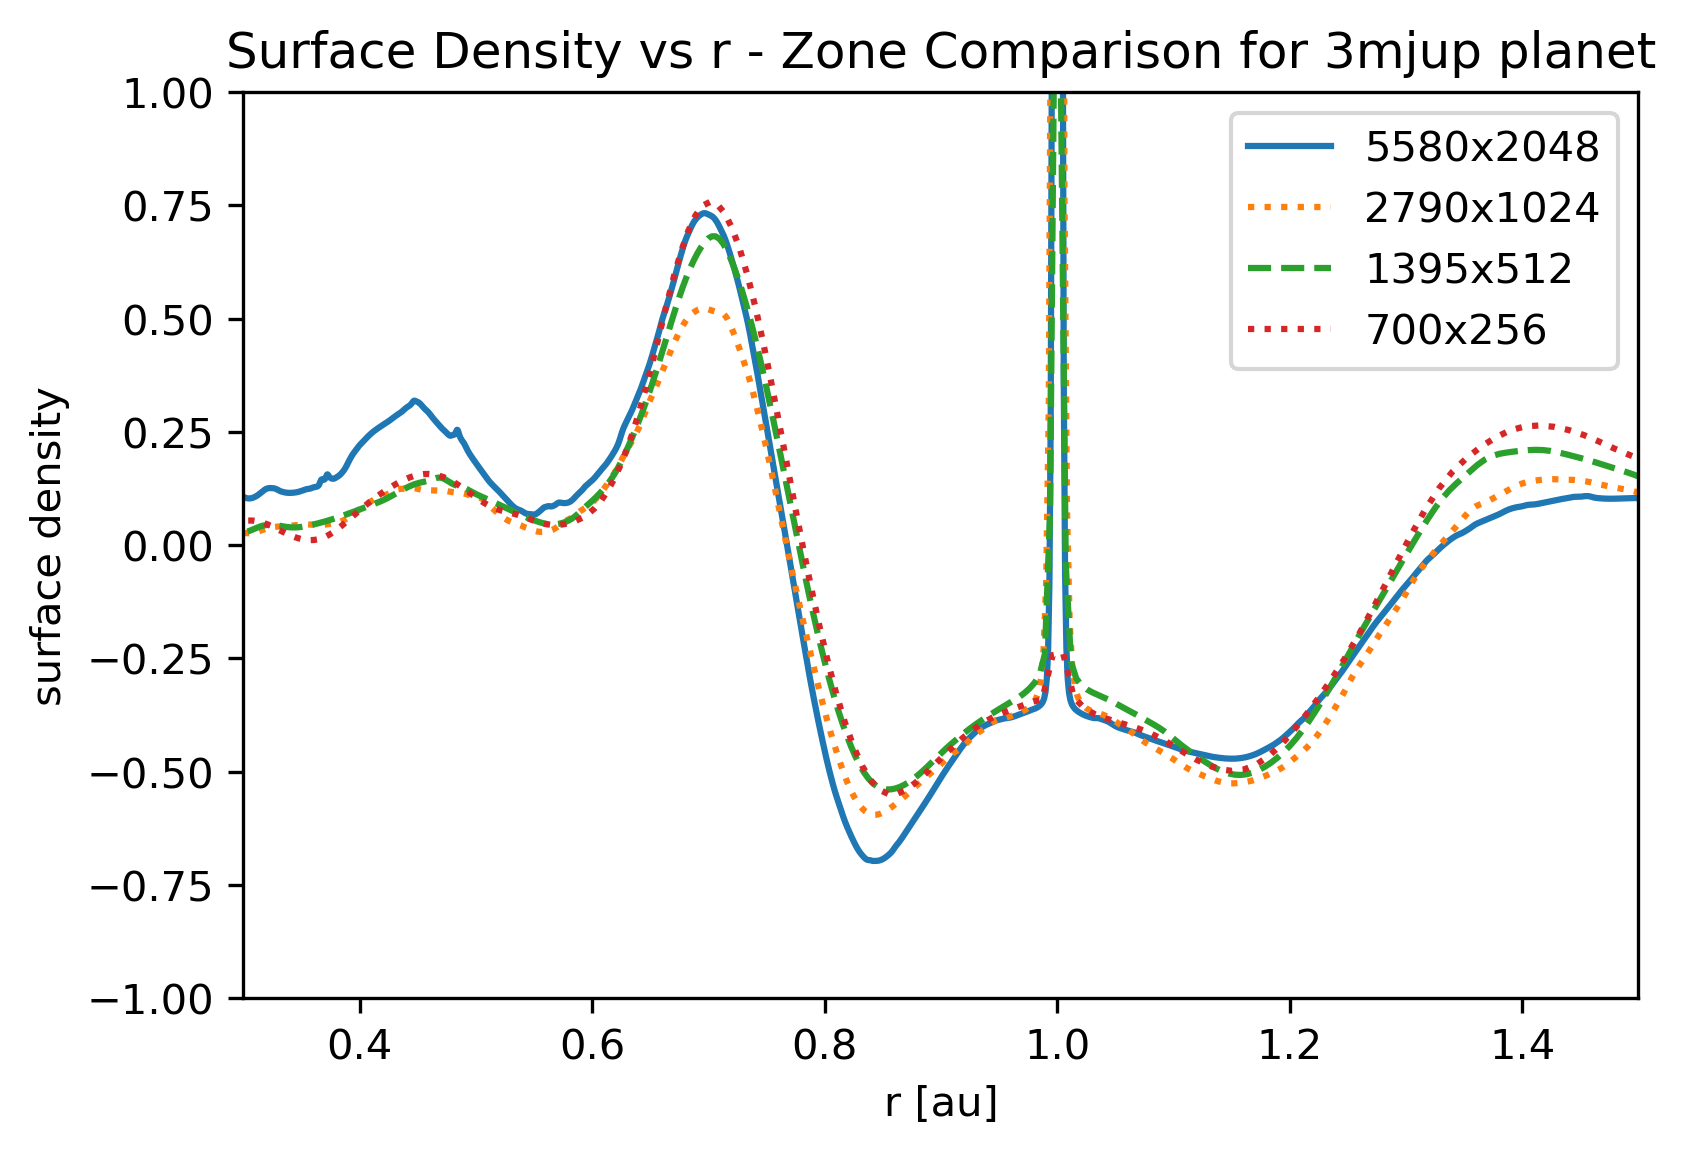

In [23]:
import readfargo as fg
import matplotlib.pyplot as plt

dir1 = './bae2017_03mth5600x2048/'
dir2 = './bae2017_03mth2800x1024/'
dir3 = './bae2017_03mth1400x512/'
dir4 = './bae2017_03mth700x256/'

itime = 5
r0 = 1.0
fargo1    = fg.frame(itime,rho=True,vphi=True,vr=True,vtheta=False,dir=dir1) 
fargo2    = fg.frame(itime,rho=True,vphi=True,vr=True,vtheta=False,dir=dir2) 
fargo3    = fg.frame(itime,rho=True,vphi=True,vr=True,vtheta=False,dir=dir3) 
fargo4    = fg.frame(itime,rho=True,vphi=True,vr=True,vtheta=False,dir=dir4) 
fargo1i    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=False,dir=dir1) 
fargo2i    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=False,dir=dir2) 
fargo3i    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=False,dir=dir3) 
fargo4i    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=False,dir=dir4)


fig, ax = plt.subplots(dpi = 300)
l1jup, = ax.plot(fargo1.r,(fargo1.rho.mean(axis=1)-fargo1i.rho.mean(axis=1)), label='5580x2048')
l3jup, = ax.plot(fargo2.r,(fargo2.rho.mean(axis=1)-fargo2i.rho.mean(axis=1))/fargo2i.rho.mean(axis=1), label='2790x1024',linestyle='dotted')
l03jup, = ax.plot(fargo3.r,(fargo3.rho.mean(axis=1)-fargo3i.rho.mean(axis=1))/fargo3i.rho.mean(axis=1), label='1395x512',linestyle='dashed')
l04jup, = ax.plot(fargo4.r,(fargo4.rho.mean(axis=1)-fargo4i.rho.mean(axis=1))/fargo4i.rho.mean(axis=1), label='700x256',linestyle='dotted')
ax.legend(handles=[l1jup, l3jup,l03jup,l04jup])
ax.set_xlim(0.3,1.5)
ax.set_ylim(-1,1)
ax.set_xlabel('r [au]')
ax.set_ylabel('surface density')
ax.set_title('Surface Density vs r - Zone Comparison for 3mjup planet')
plt.savefig('density_plot3mjup_allzones.png',dpi=300)


2000


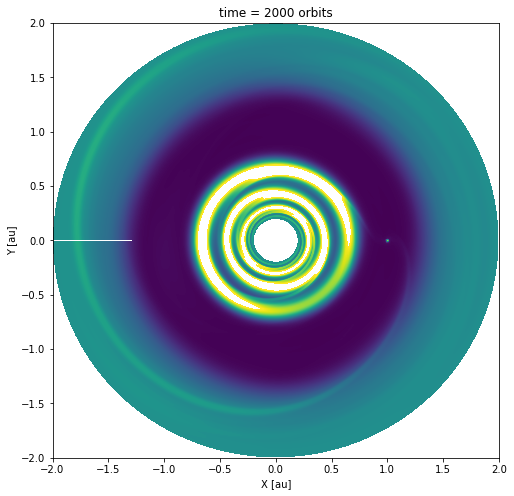

In [33]:
#imaging
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pylab as pl

path = './bae2017_03mth5600x2048/'


nf=100
phi = np.loadtxt(path +'domain_x.dat')
rad  = np.loadtxt(path +'domain_y.dat')[3:-3]

phi   = 0.5*(phi[:-1] + phi[1:]) #what does this mean?                                                                                                                          
rad   = 0.5*(rad[:-1] + rad[1:])

rad2d, phi2d = np.meshgrid(rad, phi) #explain meshgrid?                                                                                                                         

X = rad2d*np.cos(phi2d)
Y = rad2d*np.sin(phi2d)

nx = len(phi)
ny = len(rad)



print(nf*20)

rho_initial   = pl.fromfile(path +'gasdens0.dat').reshape(ny,nx)
rho   = pl.fromfile(path+'gasdens' + str(nf) + '.dat').reshape(ny,nx)
vphi_initial   = pl.fromfile(path + 'gasvx0.dat').reshape(ny,nx)
vphi   = pl.fromfile(path+'gasvx' + str(nf) + '.dat').reshape(ny,nx)
vrad     = pl.fromfile(path+'gasvy' + str(nf) + '.dat').reshape(ny,nx)


vmin = -0.
vmax = 2.
levels = np.linspace(vmin,vmax,256)

fig, ax = plt.subplots(figsize=(8,8))
ax.contourf(X, Y,(rho/rho_initial).T, levels=levels)
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_xlabel('X [au]')
ax.set_ylabel('Y [au]')
ax.set_title(f'time = {nf*20} orbits')
#plt.close()
plt.savefig('dens_image_3mjup5600.png')
